In [1]:
import cv2
import numpy as np
import imageio as io
import matplotlib.pyplot as plt

##### Carregando a imagem

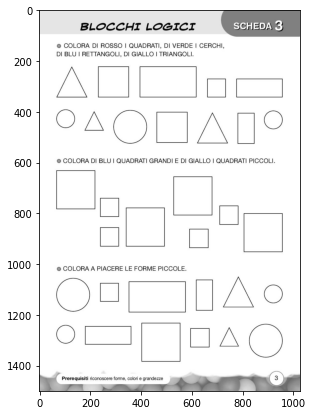

In [2]:
url = 'https://www.dropbox.com/s/tukebgmtzjnr9k8/51.jpeg?dl=1'
image = io.imread(url)
plt.figure(figsize=(15,7))
plt.imshow(image)

##### Pré-processamento

In [3]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

##### Encontrando os contornos das figuras

In [4]:
_, thresh = cv2.threshold(image_gray, 127,255,0)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

##### Desenhando os contornos

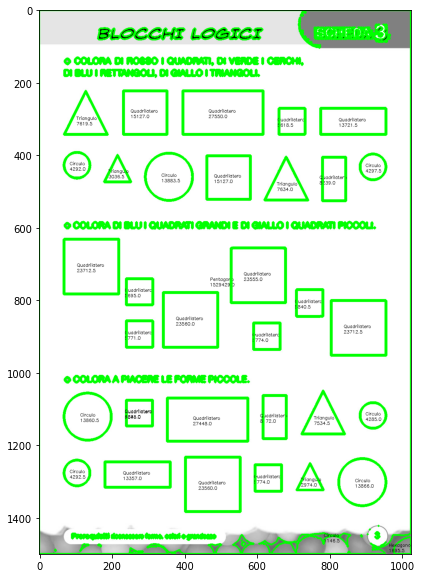

In [5]:
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    area = cv2.contourArea(contour)
    approx = cv2.approxPolyDP(contour, 0.01*perimeter, True)
    
    cv2.drawContours(image, [contour], 0, (0,255,0), 3)
    
    moment = cv2.moments(contour)
    
    if area != 0:
        x = int(moment['m10'] / moment['m00'])
        y = int(moment['m01'] / moment['m00']) 
    
    if len(approx) == 3:
        # triangulo
        if area > 1000 and x != x_previous and y != y_previous:
            cv2.putText(image, 'Triangulo', (x - 25, y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
            cv2.putText(image, str(area), (x - 25, y + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
    elif len(approx) == 4:
        # quadrilatero
        if area > 1000 and (x != x_previous or y != y_previous):
            cv2.putText(image, 'Quadrilatero', (x - 40, y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
            cv2.putText(image, str(area), (x - 40, y + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
    elif len(approx) == 5:
        # pentagono
        if area > 1000 and x != x_previous and y != y_previous:
            cv2.putText(image, 'Pentagono', (x - 40, y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
            cv2.putText(image, str(area), (x - 40, y + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
    elif len(approx) == 6:
        # hexagono
        if area > 1000 and x != x_previous and y != y_previous:
            cv2.putText(image, 'Hexagono', (x - 40, y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
            cv2.putText(image, str(area), (x - 40, y + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
    elif len(approx) == 8:
        # octogono
        if area > 1000 and x != x_previous and y != y_previous:
            cv2.putText(image, 'Octogono', (x - 40, y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
            cv2.putText(image, str(area), (x - 40, y + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
    else:
        # circulo
        if area > 1000 and x != x_previous and y != y_previous:
            cv2.putText(image, 'Circulo', (x - 20, y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
            cv2.putText(image, str(area), (x - 20, y + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))

    x_previous = x
    y_previous = y
    

plt.figure(figsize=(50,10))
plt.imshow(image)
plt.show()